# Epidemiology II: Stochastic SIR Model Code

<ins>The Stochastic SIR Model</ins>

Like the deterministic SIR model, the stochastic SIR model involves dividing the population according to whether they are (S)usceptible, (I)nfectious or (R)emoved. Again, $N$ is the total number of individuals, where $N = S+I+R$.

In the stochastic SIR model, at any time $t$ the infection rate is $\beta S I$ and the removal rate is $\mu I$. The total rate at which events occur is therefore $\beta S I + \mu I$.

The stochastic SIR model involves repeating the following steps:

- Sample the time from now until the next event from an exponential distribution with total rate $\beta S I + \mu I$.
- Choose the type of the next event: either an infection ($S \to S - 1$, $I \to I + 1$) or a removal ($I \to I - 1$, $R \to R + 1$).

These steps are repeated until the outbreak is over (i.e. $I$ reaches zero).

As described in the lecture, in the second step |the probability that the next event is an infection is given by $\frac{\beta S I}{\beta S I + \mu I}$. The probability than the next event is instead a removal event is given by $\frac{\mu I}{\beta S I + \mu I}$.

As for the deterministic SIR model, the basic reproduction number is given by
$ R_0 = \frac{\beta N}{\mu}. $

The Python code below runs a single simulation of the stochastic SIR model. Results are shown for specific parameter values: $ N=1000$, $\beta = 3 \times 10^{-4}$ and $\mu = 0.1$, corresponding to $R_0 = 3$. The initial conditions are $S(0) = N - 5$, $I(0) = 5$, and $R(0) = 0$. So, we start with only 5 infectious individuals.

n.b. If you rerun the code below multiple times, you should see slightly different outbreaks each time (e.g. different final numbers of removed individuals).

In [30]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call "np" rather than "numpy".
import matplotlib.pyplot as plt

In [31]:
# --- Problem setup --- #

# Parameter values
beta = 3.0*10**-4
mu = 0.1

# Set up arrays to record event times, and values of S, I and R after after each event
SVec = np.array([])
IVec = np.array([])
RVec = np.array([])
tVec = np.array([])

# Set initial conditions and the initial time
S = 10**3 - 5
I = 5
R = 0
t = 0

# Record initial conditions in the S, I, R and t arrays
SVec = np.append(SVec, S)
IVec = np.append(IVec, I)
RVec = np.append(RVec, R)
tVec = np.append(tVec, t)

In [32]:
# --- While the outbreak is ongoing (I > 0), generate events --- #
  
while I > 0:
    
    r1 = np.random.uniform(0, 1, 1)
    totalRate = beta*I*S + mu*I
    t = t - (1/totalRate)*np.log(r1)
    
    r2 = np.random.uniform(0, 1, 1)
    if r2 < beta*I*S/totalRate:
        S = S - 1
        I = I + 1
    else:
        I = I - 1
        R = R + 1
        
    SVec = np.append(SVec, S)
    IVec = np.append(IVec, I)
    RVec = np.append(RVec, R)
    tVec = np.append(tVec, t)

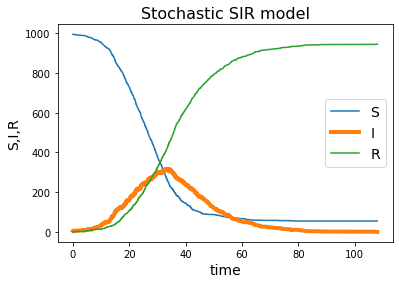

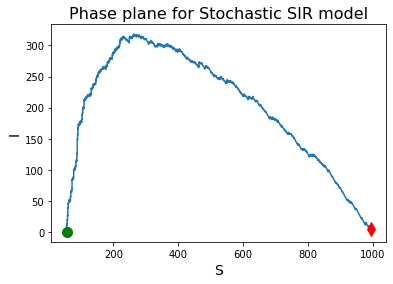

At the end of the simulation, the final values of S, I, and R are (rounded):
S(t=tf) = 55
I(t=tf) = 0
R(t=tf) = 945


In [33]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(tVec, SVec, label = "S")
plt.plot(tVec, IVec, lw = 4, label = "I")
plt.plot(tVec, RVec, label = "R")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("Stochastic SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(SVec, IVec)

# labels etc
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Phase plane for Stochastic SIR model", fontsize = 16)

# put some markers to show initial and final states
plt.plot(SVec[0], IVec[0], 'rd', markersize = 10)
plt.plot(SVec[-1], IVec[-1], 'go', markersize = 10)
plt.show()

# --- Report the final values of S, I, R.  --- #

print("At the end of the simulation, the final values of S, I, and R are (rounded):")
print("S(t=tf) =", round(SVec[-1]))
print("I(t=tf) =", round(IVec[-1]))
print("R(t=tf) =", round(RVec[-1]))